In [1]:
import pandas as pd
import numpy  as np

import plotly.graph_objects as go
import matplotlib.pyplot    as plt
import seaborn              as sns

In [2]:
path = "https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv"

In [3]:
wine_data = pd.read_csv(path)

wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
wine_data.shape

(178, 14)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
wine_data_corr = wine_data.corr()

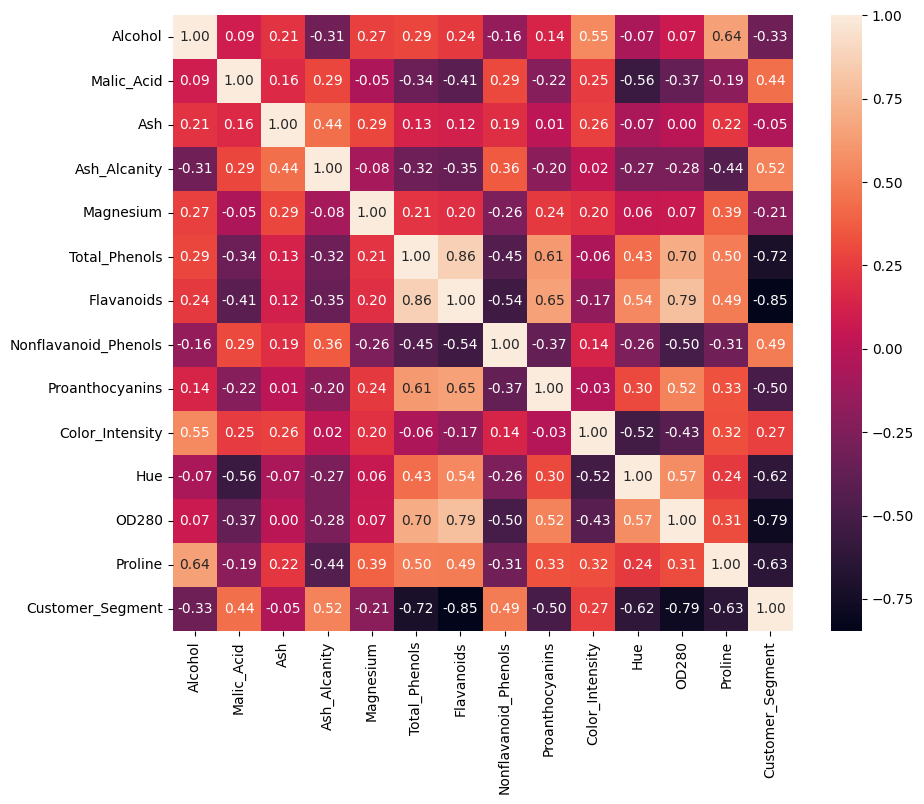

In [8]:
plt.figure(figsize=(10,8))

sns.heatmap(wine_data_corr, annot=True, fmt=".2f")

plt.show()

In [9]:
features = wine_data.columns

features

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

Min-Max Scaler Normalization

In [10]:
wine_data_norm = wine_data.copy()

for feature in features:
  wine_data_norm[feature] = (wine_data[feature] - np.min(wine_data[feature])) / (np.max(wine_data[feature]) - np.min(wine_data[feature]))

In [11]:
wine_data_norm.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [12]:
wine_data_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
min_max_scaler = MinMaxScaler()

In [15]:
wine_data_np = min_max_scaler.fit_transform(wine_data)
wine_data = pd.DataFrame(wine_data_np, columns=features)

wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [16]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=4)

kmeans

KMeans(n_clusters=4)

In [19]:
kmeans.fit(wine_data)

KMeans(n_clusters=4)

In [20]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [21]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=wine_data['Color_Intensity'],
    y=wine_data['Alcohol'],
    mode='markers',
    marker=dict(color=kmeans.labels_.astype(np.float64)),
    text=kmeans.labels_
  )
)

fig.show()

### para n=3

In [22]:
kmeans = KMeans(n_clusters=3)

kmeans

KMeans(n_clusters=3)

In [23]:
kmeans.fit(wine_data)

KMeans(n_clusters=3)

In [24]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [25]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=wine_data['Color_Intensity'],
    y=wine_data['Alcohol'],
    mode='markers',
    marker=dict(color=kmeans.labels_.astype(np.float64)),
    text=kmeans.labels_
  )
)

fig.show()

In [27]:
fig = go.Figure()

fig.add_trace(
  go.Scatter3d(
    x=wine_data['Color_Intensity'],
    y=wine_data['Alcohol'],
    z=wine_data['Proline'],
    mode='markers',
    marker=dict(color=kmeans.labels_.astype(np.float64)),
    text=kmeans.labels_
  )
)

fig.update_layout(
  scene=dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline',
  )
)

fig.show()

In [28]:
kmeans.cluster_centers_

array([[0.55832438, 0.5147213 , 0.57470261, 0.55869977, 0.31543922,
        0.24074595, 0.09661586, 0.60531382, 0.23755875, 0.51734345,
        0.16741331, 0.15392091, 0.24932312, 0.98979592],
       [0.71109649, 0.25      , 0.58716578, 0.34295533, 0.4009058 ,
        0.64408046, 0.55713783, 0.29937107, 0.4701367 , 0.35938567,
        0.47655827, 0.69358974, 0.59595816, 0.00833333],
       [0.32295957, 0.23093888, 0.46981322, 0.4878231 , 0.26134216,
        0.43883058, 0.36629365, 0.43833744, 0.38348649, 0.15170401,
        0.46808059, 0.55539629, 0.16749364, 0.5       ]])

In [29]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=wine_data.columns)

centers

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [37]:
fig = go.Figure()

fig.add_trace(
  go.Scatter3d(
    x=wine_data['Color_Intensity'],
    y=wine_data['Alcohol'],
    z=wine_data['Proline'],
    mode='markers',
    marker=dict(color=kmeans.labels_.astype(np.float64)),
    text=kmeans.labels_
  )
)

fig.add_trace(
  go.Scatter3d(
    x=centers['Color_Intensity'],
    y=centers['Alcohol'],
    z=centers['Proline'],
    mode='markers',
    marker=dict(color='red'),
    text=[0, 1, 2]
  )
)

fig.update_layout(
  scene=dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline',
  )
)

fig.data[0].name = 'Dados'
fig.data[1].name = 'Centros'

fig.show()

# Coenficiente da silhueta

Avaliar em uma escala de -1 a 1 em relação:
- Ao grupo (coesão)
- Aos demais pontos (dissimilaridade)

Quanto maior o valor da silhueta dos pontos, melhor

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
faixa_n_clusters = [i for i in range(2, 10)]

faixa_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
silhouette_values = []

for k in faixa_n_clusters:
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(wine_data)
  silhouette_mean = silhouette_score(wine_data, labels)
  silhouette_values.append(silhouette_mean)

In [43]:
for i, k in enumerate(silhouette_values):
  print(f"{i+2} => {k}")

2 => 0.3450438553643068
3 => 0.36950618492736303
4 => 0.30456480046096884
5 => 0.24281051077297658
6 => 0.2296199706850129
7 => 0.2438910120455945
8 => 0.13226715517731447
9 => 0.13480548904106127


In [47]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=list(range(2, 10)),
    y=silhouette_values
  )
)

fig.update_layout(
  dict(
    xaxis_title = 'Número de Clusters',
    yaxis_title = 'Média do Coeficiente de Silhueta'
  )
)

fig.show()